In [1]:
import pandas as pd
import numpy as np

In [2]:
# path_test = r"C:\Users\vaibh\Documents\Analysis\Files\Code\nwater\test.xvg"
path_wam  = r"C:\Users\vaibh\Documents\Analysis\CodeFiles\nwater\nw_wam.xvg"
path_wch  = r"C:\Users\vaibh\Documents\Analysis\CodeFiles\nwater\nw_wch.xvg"
path_wop  = r"C:\Users\vaibh\Documents\Analysis\CodeFiles\nwater\nw_wop.xvg"
path_wc36 = r"C:\Users\vaibh\Documents\Analysis\CodeFiles\nwater\nw_wc36.xvg"
path_mam  = r"C:\Users\vaibh\Documents\Analysis\CodeFiles\nwater\nw_mam.xvg"
path_mch  = r"C:\Users\vaibh\Documents\Analysis\CodeFiles\nwater\nw_mch.xvg"
path_mop  = r"C:\Users\vaibh\Documents\Analysis\CodeFiles\nwater\nw_mop.xvg"
path_mc36 = r"C:\Users\vaibh\Documents\Analysis\CodeFiles\nwater\nw_mc36.xvg"

In [3]:
data = []
ff = ["wam", "wch", "wop", "wc36", "mam", "mch", "mop", "mc36"]

In [4]:
for f in ff:
    with open(globals()[f'path_{f}'], 'r') as f:
        line = f.readlines()
        flag=False
        tmp = []
        for x in line:
            if not flag:
                if x.strip().startswith('@TYPE'):
                    flag = True
                continue
            else:
                tmp.append(int(x.split()[1]))    
        data.append(tmp)
        del tmp

In [5]:
col = list(range(0, int(1e+06)+1, 10))

df = pd.DataFrame(data=data, columns=col, index=ff)
df = df.transpose()
df.head()

,wam,wch,wop,wc36,mam,mch,mop,mc36
0,6,3,5,4,4,3,2,4
10,7,4,4,3,7,3,2,5
20,7,4,4,5,7,3,1,4
30,7,3,6,4,6,1,1,5
40,7,4,5,5,6,4,2,4


In [6]:
df.tail()

,wam,wch,wop,wc36,mam,mch,mop,mc36
999960,6,5,4,8,7,14,13,5
999970,5,2,4,10,10,10,14,6
999980,5,3,5,9,9,16,11,5
999990,6,5,4,11,10,12,14,8
1000000,5,3,4,7,15,10,12,4


In [7]:
# mu_nw = []
# for f in ff:
#     mu_nw.append(df[f'{f}'].mean())
    
# print(mu_nw)

In [8]:
# Saving Dataframes to exel files
# df.to_excel("nwater.xlsx", index=True)

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

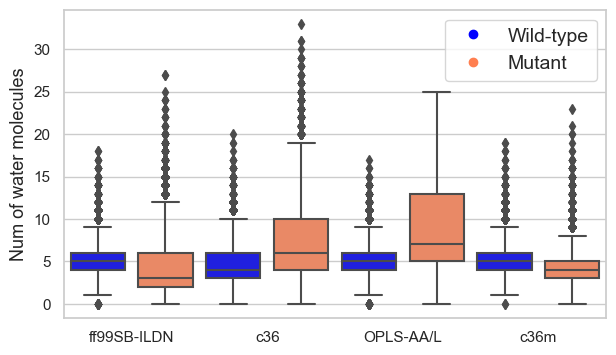

In [12]:
plt.figure(figsize=(7, 4))
sns.set_theme(style="whitegrid")
palette = {'wam': 'blue', 'wch': 'blue', 'wop': 'blue', 'wc36': 'blue',
           'mam': 'coral', 'mch': 'coral', 'mop': 'coral', 'mc36': 'coral'}
# Boxplot
sns.boxplot(data=df[['wam', 'mam', 'wch', 'mch', 'wop', 'mop', 'wc36', 'mc36']], palette=palette)
plt.xticks([0.5, 2.5, 4.5, 6.5], ['ff99SB-ILDN', 'c36', 'OPLS-AA/L', 'c36m'])
# plt.ylim(0,10)

plt.ylabel('Num of water molecules', fontsize=13)

# Create custom legend labels
legend_labels = {'Wild-type': 'blue', 'Mutant': 'coral'}
custom_legend = [plt.Line2D([0], [0], marker='o', color=color, label=label, linestyle='') for label, color in legend_labels.items()]

# Add legend
plt.legend(handles=custom_legend, fontsize=14)

plt.savefig('nw_box.png', dpi=600)
plt.show()

In [13]:
# RUNNING AVG
window_size = 250
df_avg = df.rolling(window=window_size).mean()
df_avg.dropna(inplace=True)
df_avg.head()

,wam,wch,wop,wc36,mam,mch,mop,mc36
2490,8.392,3.780,6.136,4.676,5.836,2.748,1.888,4.044
2500,8.400,3.796,6.136,4.680,5.836,2.756,1.892,4.044
2510,8.404,3.800,6.140,4.696,5.832,2.756,1.892,4.036
2520,8.404,3.812,6.144,4.692,5.824,2.760,1.892,4.036
2530,8.412,3.828,6.140,4.696,5.820,2.768,1.896,4.036


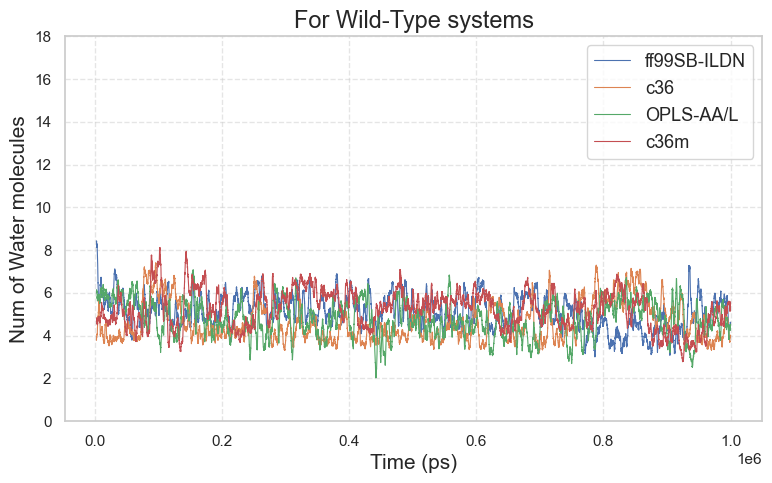

In [14]:
plt.figure(figsize=(9, 5))

# Plotting the lines
lines = plt.plot(df_avg[['wam', 'wch', 'wop', 'wc36']], linewidth=0.8)

# Setting grid
plt.grid(True, linestyle='--', alpha=0.5)

# Setting labels and title
plt.xlabel('Time (ps)', fontsize=15)
plt.ylabel('Num of Water molecules', fontsize=15)
plt.ylim(0, 18)
plt.title('For Wild-Type systems', fontsize=17)

# Setting legend labels
legend_labels = ['ff99SB-ILDN', 'c36', 'OPLS-AA/L', 'c36m']
plt.legend(lines, legend_labels, fontsize=13, bbox_to_anchor=(1, 1))

# Saving and showing plot
plt.savefig('nw_wt.png', dpi=600)
plt.show()


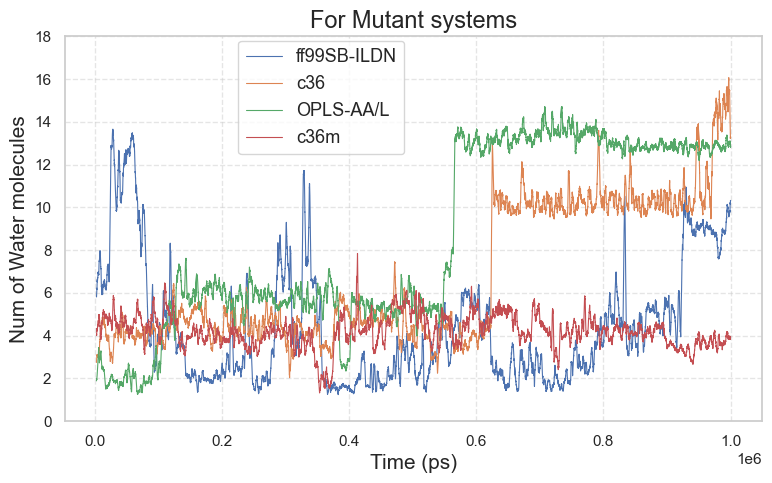

In [17]:
plt.figure(figsize=(9, 5))

# Plotting the lines
lines = plt.plot(df_avg[['mam', 'mch', 'mop', 'mc36']], linewidth=0.8)

# Setting grid
plt.grid(True, linestyle='--', alpha=0.5)

# Setting labels and title
plt.xlabel('Time (ps)', fontsize=15)
plt.ylabel('Num of Water molecules', fontsize=15)
plt.ylim(0, 18)
plt.title('For Mutant systems', fontsize=17)

# Setting legend labels
legend_labels = ['ff99SB-ILDN', 'c36', 'OPLS-AA/L', 'c36m']
plt.legend(lines, legend_labels, fontsize=13, bbox_to_anchor=(0.5, 0.67))
# plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=13)

# Saving and showing plot
plt.savefig('nw_mt.png', dpi=600)
plt.show()
